In [605]:
import pandas as pd
import numpy as np

In [606]:
data = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [607]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [608]:
data.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [609]:
data.duplicated().any()

np.False_

In [610]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [611]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [612]:
data['MonthlyCharges'].value_counts()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
56.85      1
101.70     1
48.40      1
108.35     1
72.00      1
Name: count, Length: 1585, dtype: int64

In [613]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [614]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', 0)

In [615]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

y = [1 if x == 'Yes' else 0 for x in data['Churn']]
X = data.drop(columns=['customerID','Churn'])

numerical_columns = ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']
categorical_columns = ['gender', 'Partner', 'Dependents', 
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numerical_preprocessor, numerical_columns)])

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.822


In [616]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

y = [1 if x == 'Yes' else 0 for x in data['Churn']]
X = data.drop(columns=['customerID','Churn'])

numerical_columns = ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']
categorical_columns = ['gender', 'Partner', 'Dependents', 
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numerical_preprocessor, numerical_columns)])

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", XGBClassifier())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.793


In [617]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

y = [1 if x == 'Yes' else 0 for x in data['Churn']]
X = data.drop(columns=['customerID','Churn'])

numerical_columns = ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']
categorical_columns = ['gender', 'Partner', 'Dependents', 
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numerical_preprocessor, numerical_columns)])

clf = Pipeline(
    steps=[("preprocessor", preprocessor)]
)

X = clf.fit_transform(X)

X_train_0, X_test, y_train_0, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


X_train, X_val, y_train, y_val = train_test_split(
    X_train_0, y_train_0, test_size=0.2, random_state=42, stratify=y_train_0
)

def build_model():
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(16, activation='sigmoid'),
        tf.keras.layers.Dense(16, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC', 'recall']
    )

    model.summary()

    return model

model = build_model()

X_train = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_val = X_val.toarray() if hasattr(X_val, "toarray") else X_val

y_train = np.array(y_train)
y_val = np.array(y_val)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=16,
    verbose=1
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',    # surveille la perte de validation
    patience=3,            # tolère 3 époques sans amélioration
    restore_best_weights=True
)

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_288 (Dense)               │ (None, 64)             │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_289 (Dense)               │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_290 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_291 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,273 (16.69 KB)

 Trainable params: 4,273 (16.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6137 - accuracy: 0.7441 - loss: 0.5611 - recall: 0.0000e+00 - val_AUC: 0.8417 - val_accuracy: 0.7347 - val_loss: 0.4685 - val_recall: 0.0000e+00
Epoch 2/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8301 - accuracy: 0.7638 - loss: 0.4570 - recall: 0.2586 - val_AUC: 0.8462 - val_accuracy: 0.8146 - val_loss: 0.4347 - val_recall: 0.5050
Epoch 3/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8462 - accuracy: 0.7945 - loss: 0.4284 - recall: 0.5679 - val_AUC: 0.8422 - val_accuracy: 0.8092 - val_loss: 0.4299 - val_recall: 0.5418
Epoch 4/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8270 - accuracy: 0.7870 - loss: 0.4364 - recall: 0.5762 - val_AUC: 0.8435 - val_accuracy: 0.8083 - val_loss: 0.4277 - val_recall: 0.5987
Epoch 5/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8371 - accuracy: 0.7892 - loss: 0.4373 - recall: 0.6147 - val_AUC: 0.8438 - val_accuracy: 0.8119 - val_loss: 0.4283 - val_recall: 0.5452
Ep

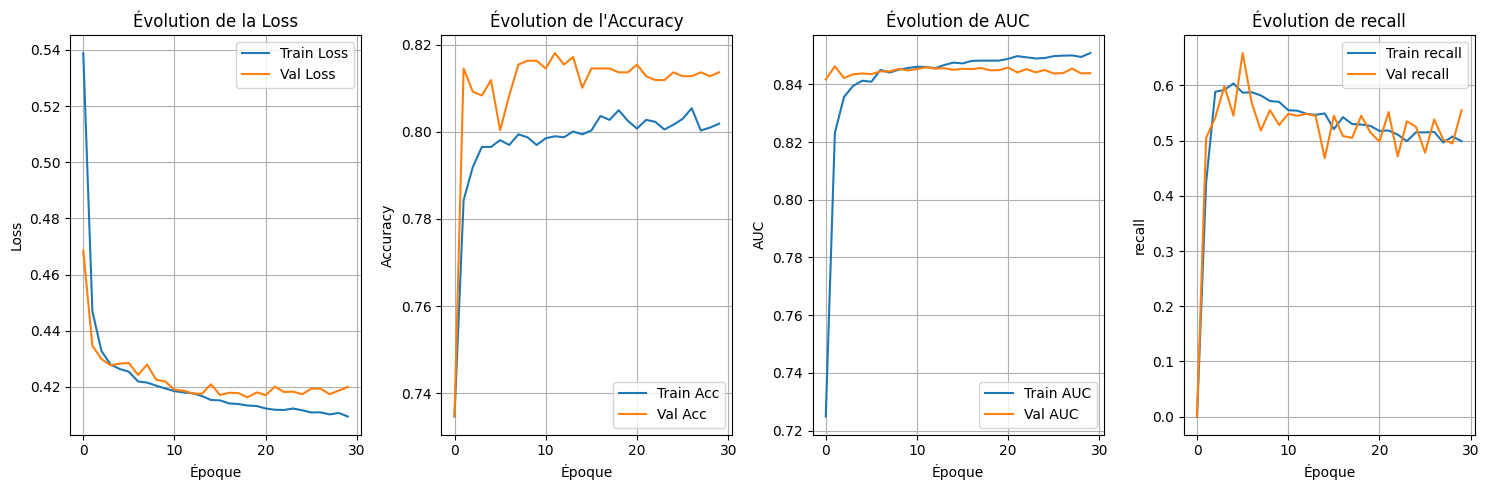

In [618]:
import matplotlib.pyplot as plt

def plot_loss_acc(history, validation=True):
    """
    Trace la loss et l'accuracy du modèle pendant l'entraînement.
    """
    plt.figure(figsize=(15, 5))

    # Loss
    plt.subplot(1, 4, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    if validation and 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Évolution de la Loss')
    plt.xlabel('Époque')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Accuracy
    plt.subplot(1, 4, 2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    if validation and 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title("Évolution de l'Accuracy")
    plt.xlabel('Époque')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # AUC
    plt.subplot(1, 4, 3)
    plt.plot(history.history['AUC'], label='Train AUC')
    if validation and 'val_AUC' in history.history:
        plt.plot(history.history['val_AUC'], label='Val AUC')
    plt.title("Évolution de AUC")
    plt.xlabel('Époque')
    plt.ylabel('AUC')
    plt.legend()
    plt.grid()

    # Recall
    plt.subplot(1, 4, 4)
    plt.plot(history.history['recall'], label='Train recall')
    if validation and 'val_recall' in history.history:
        plt.plot(history.history['val_recall'], label='Val recall')
    plt.title("Évolution de recall")
    plt.xlabel('Époque')
    plt.ylabel('recall')
    plt.legend()
    plt.grid()


    plt.tight_layout()
    plt.show()
    
plot_loss_acc(history)

In [619]:
X_test = X_test.toarray() if hasattr(X_test, "toarray") else X_test
y_test = np.array(y_test)

test_results = model.evaluate(X_test, y_test, verbose=1)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8386 - accuracy: 0.7888 - loss: 0.4286 - recall: 0.5354


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


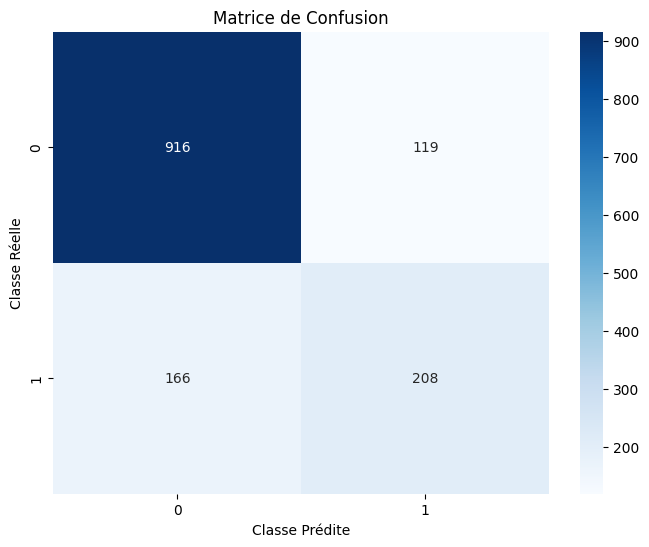


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.64      0.56      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [620]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Predict probabilities
y_pred_probs = model.predict(X_test)

# Binary classification threshold
y_pred = (y_pred_probs >= 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title("Matrice de Confusion")
plt.xlabel("Classe Prédite")
plt.ylabel("Classe Réelle")
plt.show()

# Optional: classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [621]:
X_test_dense = X_test.toarray() if hasattr(X_test, "toarray") else X_test
X_train_dense = X_train.toarray() if hasattr(X_train, "toarray") else X_train

In [622]:
import shap

explainer = shap.DeepExplainer(model, X_train_dense[:100])  
shap_values = explainer.shap_values(X_test_dense[:50])  
ohe = clf.named_steps['preprocessor'].named_transformers_['one-hot-encoder']
encoded_cat_names = ohe.get_feature_names_out(categorical_columns)
all_feature_names = np.concatenate([encoded_cat_names, np.array(numerical_columns)])

/home/david/Churnprediction/ChurnPrediction/.venv/lib/python3.12/site-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/home/david/Churnprediction/ChurnPrediction/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_341
Received: inputs=['Tensor(shape=(100, 45))']
  warnings.warn(msg)
/home/david/Churnprediction/ChurnPrediction/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_341
Received: inputs=['Tensor(shape=(200, 45))']
  warnings.warn(msg)
/home/david/Churnprediction/ChurnPrediction/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:238:

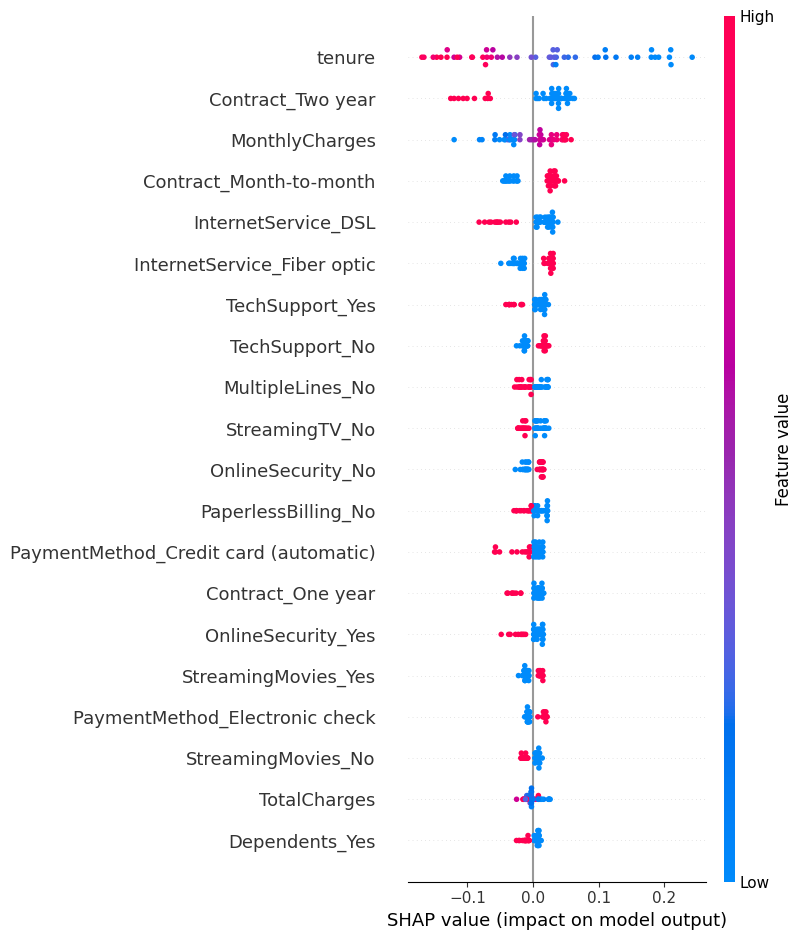

In [623]:
import numpy as np


shap_values_squeezed = np.squeeze(shap_values, axis=2) 


shap.summary_plot(shap_values_squeezed, X_test_dense[:50], feature_names=all_feature_names)
